<a href="https://colab.research.google.com/github/namoshi/chiral/blob/master/new_logit_chiral-pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression for Chiral/Achiral Classification  (New Data)

In [0]:
import numpy as np
import pandas as pd
import csv
#import matplotlib.pyplot as plt
from sklearn import linear_model
from keras.utils import np_utils
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# chiral データの読み込み
chiral = pd.read_csv('https://raw.githubusercontent.com/namoshi/chiral/master/2atoms-chiral.csv')

# データの最初の部分の表示
chiral.head()

,Table No.,ICSD No.,Space Group,Struct.formula,Unnamed: 4,元素1,元素1数,族1,周期1,Unnamed: 9,元素2,元素2数,族2,周期2,晶系,Unnamed: 15,Unnamed: 16
0,1,2262,P 1,Be P2,Be,Be,1.0,2,2,P2,P,2.00,15,3,Triclinic,NaN,NaN
1,1,1440,F 1,Si O2,Si,Si,1.0,14,3,O2,O,2.00,16,2,Triclinic,NaN,NaN
2,1,10422,P 1,Fe S2,Fe,Fe,1.0,8,4,S2,S,2.00,16,3,Triclinic,NaN,NaN
3,1,23594,P 1,Au2 Te3,Au2,Au,2.0,11,6,Te3,Te,3.00,16,5,Triclinic,NaN,NaN
4,1,80966,P 1,Re Si1.75,Re,Re,1.0,7,6,Si1.75,Si,1.75,14,3,Triclinic,NaN,NaN


In [15]:
# achiral データの読み込み
achiral = pd.read_csv('https://raw.githubusercontent.com/namoshi/chiral/master/2atoms-achiral.csv')

# データの最初の部分の表示
achiral.head()

,Table No.,ICSD No.,Space Group,Struct.formula,Unnamed: 4,元素1,元素1数,族1,周期1,Unnamed: 9,元素2,元素2数,族2,周期2,晶系,Unnamed: 15
0,2,109,P -1,Te I,Te,Te,1.0,16,5,I,I,1.0,17,5,Triclinic,NaN
1,2,193,P -1,Ca As3,Ca,Ca,1.0,2,4,As3,As,3.0,15,4,Triclinic,NaN
2,2,197,P -1,V7 O13,V7,V,7.0,5,4,O13,O,13.0,16,2,Triclinic,NaN
3,2,1501,P -1,V O2,V,V,1.0,5,4,O2,O,2.0,16,2,Triclinic,NaN
4,2,2380,P -1,Nb S3,Nb,Nb,1.0,5,5,S3,S,3.0,16,3,Triclinic,NaN


In [0]:
X_chiral = chiral[['族1', '族2']].values
y_chiral = np.ones((len(X_chiral)))

#print(X_chiral)
#print(y_chiral)

X_achiral = achiral[['族1', '族2']].values
y_achiral = np.zeros((len(X_achiral)))

#print(X_achiral)
#print(y_achiral)

In [17]:
X = np.concatenate((X_chiral, X_achiral), axis=0)
y = np.concatenate((y_chiral, y_achiral), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)


b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

#print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))

X= [[ 2 15]
 [14 16]
 [ 8 16]
 ...
 [ 1 14]
 [ 1 14]
 [ 1 14]]
y= [1. 1. 1. ... 0. 0. 0.]
A= [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
B= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
AB= [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


全サンプルにロジスティック回帰を適用

Logistic Regression for Categorical Data (using all samples)
Recognition Rates =  0.9511701566074257
Intercept is  -3.345270767328736
Coeffs are
-0.208399195071592
-0.3929817528953964
-1.1121601875806548
-0.7014738269494408
-0.025202163801785898
-0.3155447273857716
0.3271010589914057
0.525970588262103
0.008019071862011055
0.2416197371673727
-0.22806032526799166
0.6224691057797337
0.20142215098861974
0.13837275751369607
0.0838714085802444
0.7225030567252774
-0.18886352258339753
0.30318837405674426
0.9507431422227309
-0.18577307934452703
-1.49746074769589
-1.2553863723495227
-1.6678224878167438
-0.2666223729507278
0.028649974663015523
-0.4369567056287573
-0.29697915089452054
-0.07286611868618564
0.10415040199035452
0.5550231899575133
0.36919462691615423
1.1055315972459407
0.9825599907864292
1.0861262651067218
0.5450229933309151
-0.04528353846180692


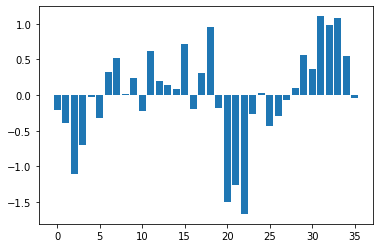

In [18]:
# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (using all samples)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()


サンプル数がアンバランスなので，achiralのサンプルから１０００サンプルをランダムに選択して，ロジスティック回帰を適用

X= [[ 2 15]
 [14 16]
 [ 8 16]
 ...
 [11 16]
 [ 1 14]
 [ 7 15]]
y= [1. 1. 1. ... 0. 0. 0.]
A= [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[105. 102. 383.  82.  87.  53.  57. 106.  75.  94.  86.  53. 134.  67.
  49.  17.   3.   2.]
B= [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[ 68.  28. 123.  25.  24.  15.  19.  25.  34.  75.  36.  52. 134. 232.
 197. 353. 115.]
AB= [[0. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Logistic Regression for Categorical Data (1000 achiral samples are randomly selected)
Recognition Rates =  0.6996784565916399
Intercept is  -0.94544528914539
Coeffs are
-0.4694755629212545
-0.3483730886099356
-1.1596233071405755
-0.6709820826604429
0.

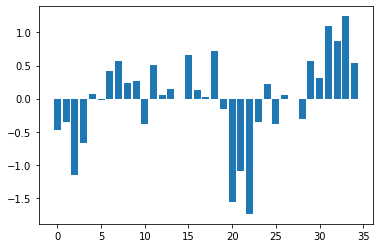

In [19]:
#===========================================================================
#### Reduce the number of achiral samples
# 1000 samples are randomly selected
sind = np.random.permutation(range(len(X_achiral)))
sind = sind[:1000]

X = np.concatenate((X_chiral, X_achiral[sind]), axis=0)
y = np.concatenate((y_chiral, y_achiral[sind]), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)

print(np.sum(a_categorical, axis=0))

b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))

# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (1000 achiral samples are randomly selected)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()


サンプル数がアンバランスなので，achiralのサンプルから２０００サンプルをランダムに選択して，ロジスティック回帰を適用

X= [[ 2 15]
 [14 16]
 [ 8 16]
 ...
 [ 7  5]
 [ 3  8]
 [13  4]]
y= [1. 1. 1. ... 0. 0. 0.]
A= [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
B= [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
AB= [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Logistic Regression for Categorical Data (2000 achiral samples are randomly selected)
Recognition Rates =  0.7796477495107632
Intercept is  -1.7032378877489933
Coeffs are
-0.10413357004382454
-0.5231065200804947
-1.0911296959817152
-0.6903411142014191
0.036997525798431394
-0.3492773077519278
0.33416611148359937
0.6367982270499518
0.3179806571654497
0.18296128256906183
-0.3211436208511577
0.17207578259825174
0.2671703983520187
-0

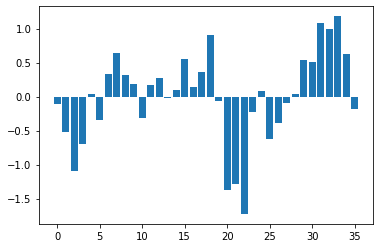

In [20]:
#==============================================================================
# 2000 samples are randomly selected
sind = np.random.permutation(range(len(X_achiral)))
sind = sind[:2000]

X = np.concatenate((X_chiral, X_achiral[sind]), axis=0)
y = np.concatenate((y_chiral, y_achiral[sind]), axis=0)
print('X=', X)
print('y=', y)

# Binary representation of the variables
a_categorical = np_utils.to_categorical(X[:,0]-1)
print('A=', a_categorical)


b_categorical = np_utils.to_categorical(X[:,1]-1)

print('B=', b_categorical)

#print(np.sum(b_categorical, axis=0))

# concatenate a_categorical and b_categorical
abxy = np.c_[a_categorical, b_categorical]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,3]/X[:,2]]
#abxy = np.c_[np.c_[a_categorical, b_categorical[:,8:]], X[:,2:3]]

print('AB=', abxy)

#print(np.sum(abxy, axis=0))

# logistic regression for categorical A and B
logreg = linear_model.LogisticRegression()

logreg.fit(abxy, y)

pred = logreg.predict(abxy)

#print('pred=', pred)

score = logreg.score(abxy, y)

print('Logistic Regression for Categorical Data (2000 achiral samples are randomly selected)')
print('Recognition Rates = ', score)

coeffs = logreg.coef_[0]
intercept = logreg.intercept_[0]

#print('Coeffs is ', coeffs)
print('Intercept is ', intercept)
print('Coeffs are')
for i in range(0, len(coeffs)):
    print(coeffs[i])

ix = range(0, len(coeffs))
plt.bar(ix, coeffs)
plt.show()
